# Higher level tools 

Aside from the matplotlib, there are some other fairly high level tools including pandas and seaborn. Both of them still use matplotlib underneath the hood. Seaborn modifies the default color schemes of matplotlib, and thus just by importing that library without any additional steps can improve the readability and aesthetics. 

## pandas series

pandas' dataframe and series both have a plot instance method, which will generate plots based on the information stored in the object. The index of series or pandas will be used the x ticks. We can turn this off by adding use_index=False. Plot() also allows us to pass an ax argument, if we desire to add the plot to a certain subplot we have defined before. Here's the example.

In [1]:
import pandas as pd 
import numpy as np


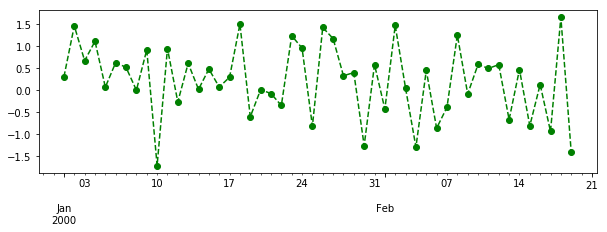

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,3])
subplot = fig.add_subplot(1,1,1)
ts_data = pd.Series(np.random.randn(50),index= pd.date_range('2000-01-01', periods=50,freq='D'))
ts_data.plot(linestyle='--',ax=subplot, color='green', marker='o')

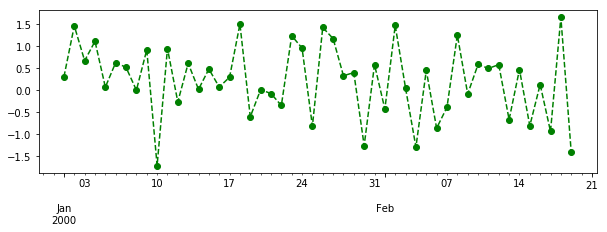

In [22]:
fig #the plot has been added to the figure object initialized in the beginning.

Two things:
1. The function plot is actually a family, and we can use syntax like plot.line() and get the same result. Other options include kde (kernel density), barh(bar plot horizontal), hist(histogram).
2. The function plot is actually using matplotlib, and thus all the options that are available in matplotlib, can be transferred painlessly here.

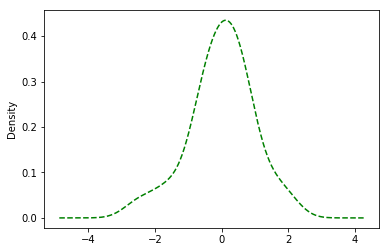

In [29]:
ts_data = pd.Series(np.random.randn(50),index= pd.date_range('2000-01-01', periods=50,freq='D'))
ts_data.plot.kde(linestyle='--', color='green')

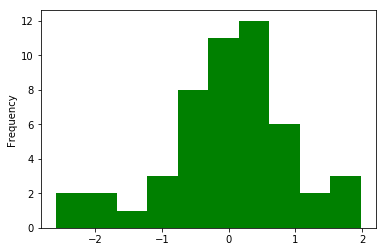

In [30]:
ts_data.plot(linestyle='--', color='green', kind='hist') #another way is to change 'kind=hist'.

## pandas dataframe

The difference between df and series is the former contains more than one column, and thus pandas allows us to pass a series of subplots. In other words, if subplots=True, all the columns will be plotted in different subplots. Otherwise, plots of all columns is going to be plotted on top of each other.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e0abef0>,
      dtype=object)

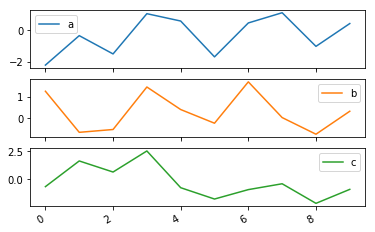

In [48]:
f, subplots = plt.subplots(3,1)
df_example = pd.DataFrame(np.random.randn(10,3), columns=['a','b', 'c'])
df_example.plot.line(subplots=True, sharex=True, ax=subplots)

There is another common type of graph, which is bar chart. It can even be used to displayed two categorical variables. The layout is like a contingency table, and the categorical data can be more than binary. Continuous input will generally not work. Categorical, or ints are both ok.

In [62]:
category_a = np.random.randint(0, 2, 100) #like smoking status
category_b = np.random.randint(0, 3, 100) #like cancer status; only to have more categories
df = pd.DataFrame({'a':category_a, 'b':category_b})
contingency_table = pd.crosstab(df.a, df.b)

In [66]:
contingency_table.columns = pd.Index(['smoker','quitter', 'never'])
contingency_table.index = pd.Index(['cancer', 'non'])

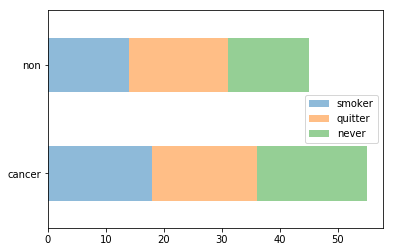

In [67]:
contingency_table.plot.barh(stacked=True, alpha=0.5)

# seaborn

Seaborn has full support for pandas and is able to find the appropriate columns based on the input label. Another awesome feature of seaborn is automatical groupby. For example, we got more than one observations for each group, seaborn will not throw and error. Quite opposite, it will figure out some quite informative ways to display them. 

In [85]:
tips = pd.read_csv('./tips.csv')

In [71]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


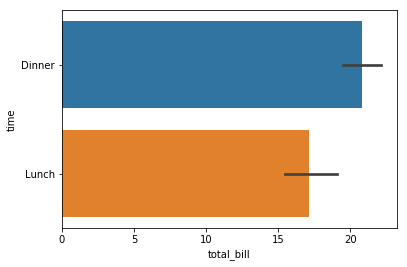

In [72]:
import seaborn as sns
sns.barplot(x='total_bill', y='time', data=tips, orient='h')

Obviously, there's more than one observation for eahc time choie (dinner vs. lunch), so pandas used the mean as the length of bar, and the small whisker for each bar indicates the 95 confidence interval for total bill. 

Another handy tool is distplot, which is kinda a combination of density plot and histogram of the pandas package. Let's use the total bill to illustrate this. We initialze a subplots array and add three graphs onto it.

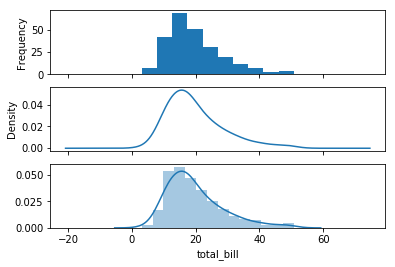

In [81]:
f, panel_of_three = plt.subplots(3,1, sharex=True)
tips['total_bill'].plot.hist(ax=panel_of_three[0])
tips['total_bill'].plot.density(ax=panel_of_three[1])
sns.distplot(tips['total_bill'], ax=panel_of_three[2])

scatterplot is used for two continuous variable, and seaborn gives us simple apis which allows us to simply pass the variable name. Here we use total bill and tip amount to demonstrate how to plot a scatterplot in seaborn. The function is regplot. And similarly, one can also use pairplot to generate a commonly used pairwise scatterplot for each variable pairs.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


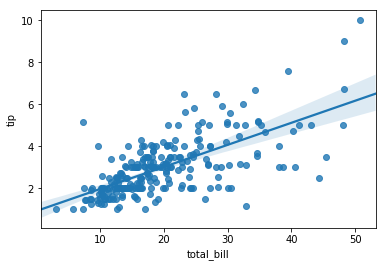

In [83]:
sns.regplot(x='total_bill', y='tip', data=tips)

In [127]:
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


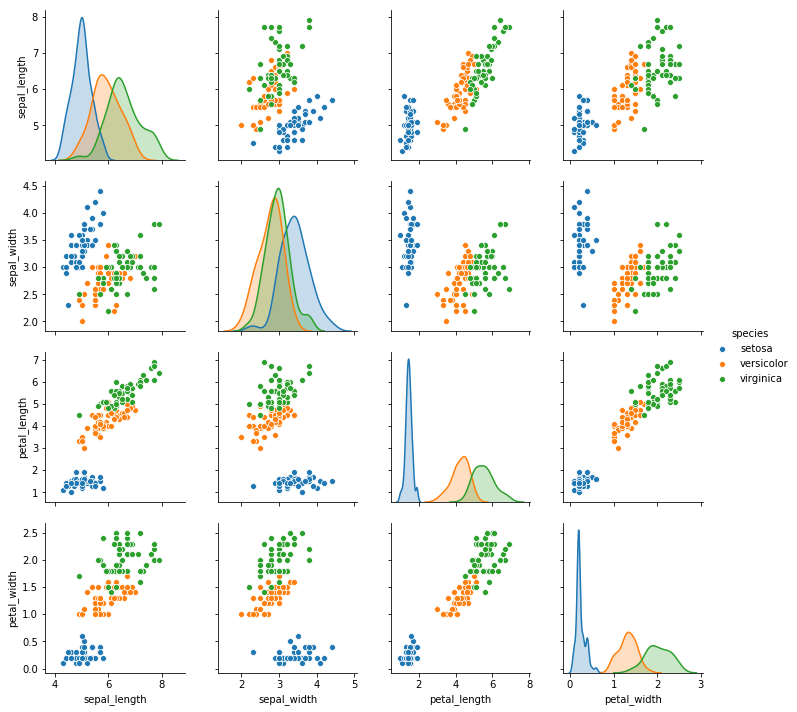

In [130]:
g = sns.pairplot(iris, hue='species', diag_kind='kde')

Facet grid is the last kind we are going to discuss here. The main point is we need multiple images based on different group labels. For instance, with the previous tip data, we can plot the side by side boxplot for tip across smoker and non-smoker group. Or similarly, we can have barchart of weekly tips (tips every day) across different dining time.

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


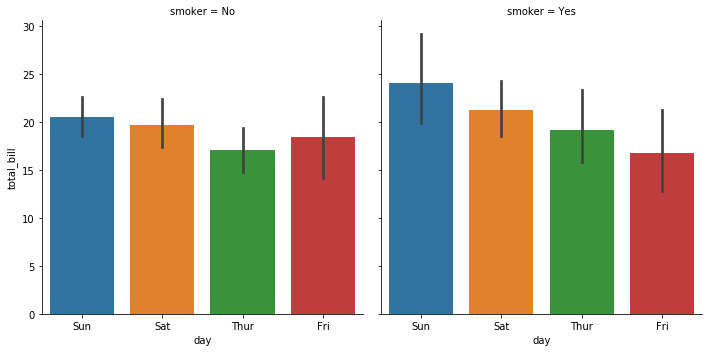

In [95]:
sns.factorplot(x='day', y='total_bill', kind='bar', col='smoker', data=tips)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


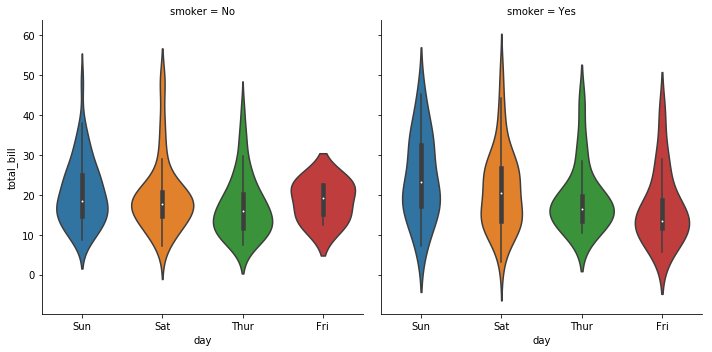

In [125]:
sns.factorplot(data=tips, kind='violin', x='day', y='total_bill', col='smoker')

The rule is, there will be only one figure if no col variable specified. As for x, and y, it's depending on what kind of graphs one needs. For instance, if it's side by side plot, it makes more sense one and only one of two variables is categorical. The same applies to barplot and violin plot. 